<a href="https://colab.research.google.com/github/muhiqbalalamin/DeepLearning/blob/main/Classification_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Folder DL/income.csv')

<ipython-input-5-770fb58b9b44>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'] = df['income'].replace({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
      Metric   PyTorch  TensorFlow
0   Accuracy  0.829563    0.843587
1  Precision  0.712438    0.720064
2     Recall  0.491295    0.574522
3   F1 Score  0.581553    0.639112
4        AUC  0.714153    0.751788
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


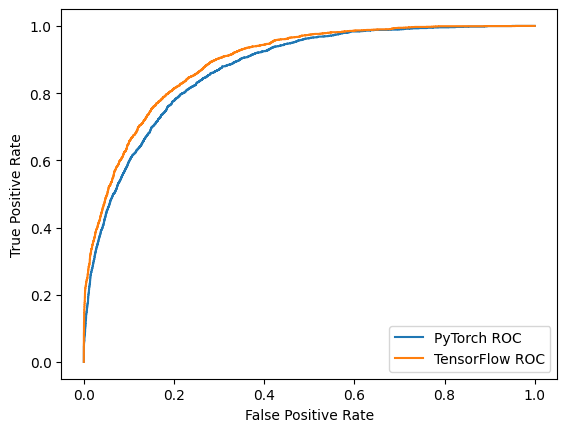

In [ ]:
# Handling missing values
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Convert target column to binary
df['income'] = df['income'].replace({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})

# Encoding categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Splitting features and target
X = df.drop(columns=['income'])
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define PyTorch model
class IncomeClassifier(nn.Module):
    def __init__(self, input_dim):
        super(IncomeClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

input_dim = X_train.shape[1]
model = IncomeClassifier(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# Training PyTorch model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Define TensorFlow model
tf_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluation function
def evaluate_model(model, X, y):
    y_pred = model(X).detach().numpy().round()
    return (
        accuracy_score(y, y_pred),
        precision_score(y, y_pred),
        recall_score(y, y_pred),
        f1_score(y, y_pred),
        roc_auc_score(y, y_pred)
    )

# PyTorch evaluation
pytorch_metrics = evaluate_model(model, X_test_tensor, y_test)

# TensorFlow evaluation
y_pred_tf = tf_model.predict(X_test).round()
tf_metrics = (
    accuracy_score(y_test, y_pred_tf),
    precision_score(y_test, y_pred_tf),
    recall_score(y_test, y_pred_tf),
    f1_score(y_test, y_pred_tf),
    roc_auc_score(y_test, y_pred_tf)
)

# Display results
metrics_names = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]
results = pd.DataFrame({"Metric": metrics_names, "PyTorch": pytorch_metrics, "TensorFlow": tf_metrics})
print(results)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model(X_test_tensor).detach().numpy())
fpr_tf, tpr_tf, _ = roc_curve(y_test, tf_model.predict(X_test))

plt.plot(fpr, tpr, label='PyTorch ROC')
plt.plot(fpr_tf, tpr_tf, label='TensorFlow ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Penjelasan metrik evaluasi:

    "Accuracy": "Accuracy = (TP + TN) / (TP + TN + FP + FN)",
    "Precision": "Precision = TP / (TP + FP)",
    "Recall": "Recall = TP / (TP + FN)",
    "F1 Score": "F1 Score = 2 * (Precision * Recall) / (Precision + Recall)",
    "AUC": "Area Under the Curve measures overall model performance"